<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/Regress%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
dataset = {"tempo": [1,3,4,4,6,8,10,10,11,13],
    "vendas": [91,110,106,116,119,129,139,143,138,159]
}

dataset = pd.DataFrame(dataset)
dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


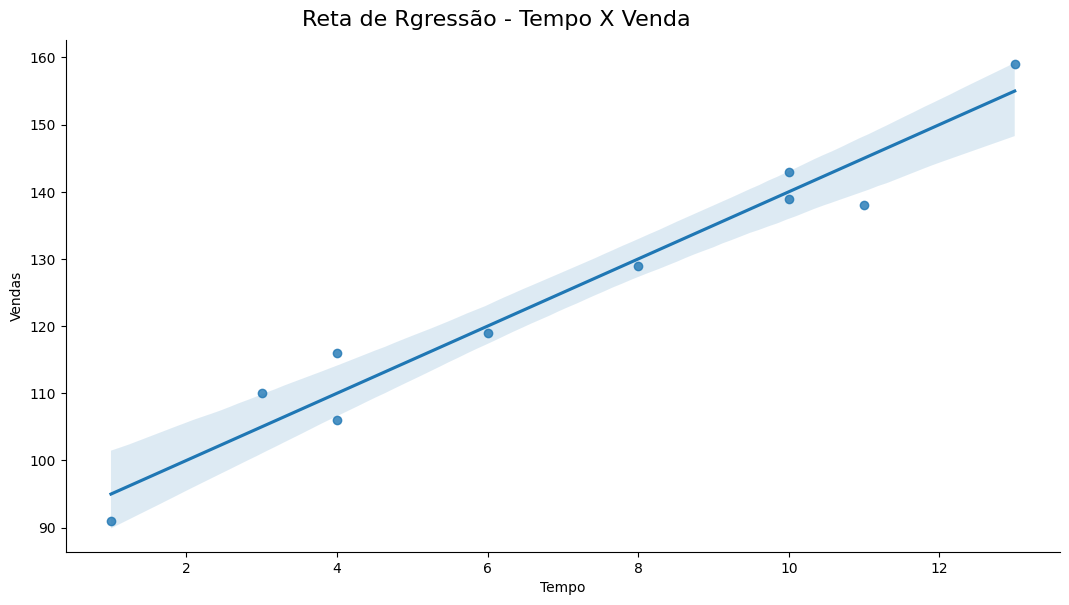

In [13]:
from pandas.io.sql import DatabaseError
ax = sns.lmplot(x="tempo", y="vendas", data=dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de Rgressão - Tempo X Venda", fontsize=16, y=1.02)
ax.set(xlabel="Tempo", ylabel="Vendas")
ax;

In [15]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [16]:
import statsmodels.api as sm

In [17]:
Y = dataset.vendas
X = sm.add_constant(dataset.tempo)

In [22]:
resultado_regressao = sm.OLS(Y,X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.22e-06
Time:                        20:16:21   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [24]:
dataset["previsao"] = resultado_regressao.predict()
dataset.head()

,tempo,vendas,previsao
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [29]:
dataset['residuos'] = dataset.previsao - dataset.vendas
dataset.head()

,tempo,vendas,previsao,residuos
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
